# Libraries and data importing

Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
activities = pd.read_parquet('../data-raw/activities.parquet')
activities

,contributor,category,repository,activity,date
0,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:19+00:00
1,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:23+00:00
2,AmplabJenkins,bot,apache/spark,Commenting pull request,2022-11-25 09:55:26+00:00
3,analysis-bot,bot,facebook/react-native,Commenting pull request,2022-11-25 09:55:27+00:00
4,neos-bot,bot,neos/neos-ui-compiled,Pushing commits,2022-11-25 09:55:47+00:00
...,...,...,...,...,...
1015418,798388,human,879434,Reviewing code,2023-04-15 16:06:15+00:00
1015419,798388,human,879434,Reviewing code,2023-04-15 16:07:26+00:00
1015420,784775,human,643744,Creating branch,2023-04-15 16:07:33+00:00
1015421,784775,human,888378,Opening pull request,2023-04-15 16:08:07+00:00


In [48]:
random_user = activities[activities['category'] == 'bot']['contributor'].sample().values[0]
contributor = (
    activities[activities['contributor'] == random_user][['repository', 'activity']]
    .groupby(['repository', 'activity'])['activity']
    .count()
    .reset_index(name='n_activities')
    .set_index('repository')
    .rename_axis(None)
    .pivot(columns='activity', values='n_activities')
    .fillna(0)
    .astype(int)
)
X = contributor.values
contributor

activity,Closing pull request,Commenting pull request,Creating branch,Creating tag,Deleting branch,Opening pull request,Publishing a release,Pushing commits
submariner-io/admiral,10,69,36,0,27,13,13,40
submariner-io/cloud-prepare,11,80,44,0,28,13,13,140
submariner-io/coastguard,0,14,7,0,7,0,0,9
submariner-io/enhancements,0,25,12,0,12,0,0,53
submariner-io/get.submariner.io,0,2,1,0,1,0,0,0
submariner-io/lighthouse,21,156,80,0,65,26,13,119
submariner-io/releases,0,159,55,0,48,0,0,48
submariner-io/shipyard,0,137,66,0,66,0,15,121
submariner-io/subctl,33,236,138,0,132,35,12,248
submariner-io/submariner,24,213,107,0,90,27,13,191


In [50]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Agglomerative Hierarchical Algorithm

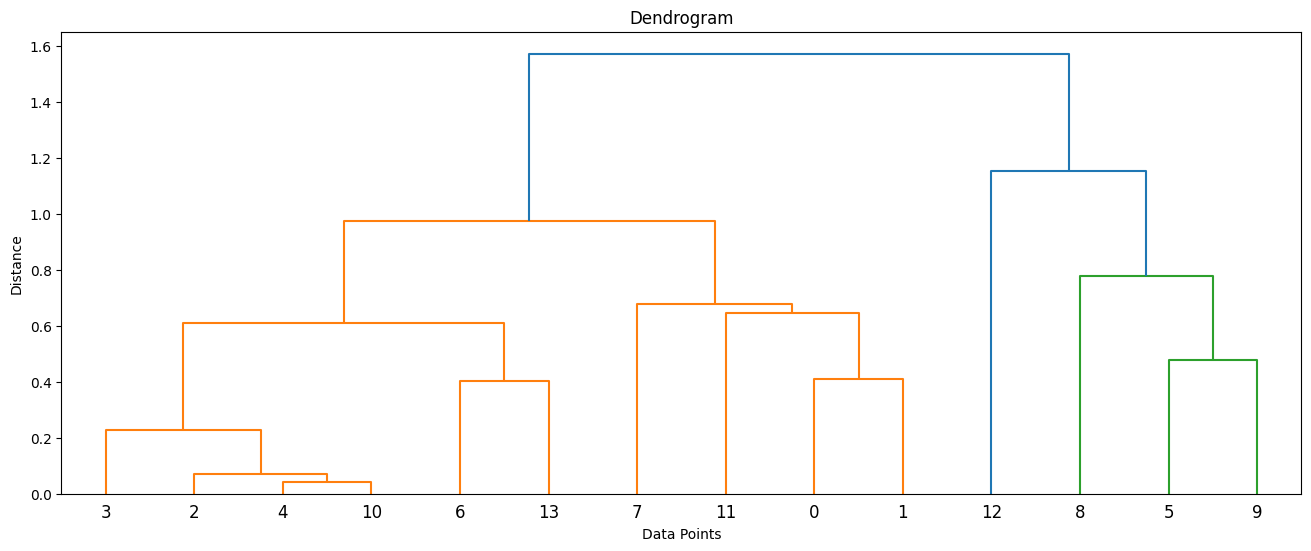

In [51]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram
plt.figure(figsize=(16, 6))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dendrogram(linkage(X, method='centroid'))
plt.show()

# K-means

In [353]:
import time
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Load your data (e.g., trainX, trainY)

# Define the hyperparameters you want to tune
parameters = {
    'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'tol': [1e-4, 1e-5, 1e-6]  # Tolerance for convergence
}

# Create a KMeans instance
kmeans = KMeans()

# Tune the hyperparameters via a cross-validated grid search
print("[INFO] Tuning hyperparameters via grid search")
grid = GridSearchCV(estimator=kmeans, param_grid=parameters, n_jobs=-1)
start = time.time()
grid.fit(X)  # Replace 'trainX' with your data
end = time.time()

# Show the grid search information
print(f"[INFO] Grid search took {end - start:.2f} seconds")
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")


[INFO] Tuning hyperparameters via grid search
[INFO] Grid search took 0.70 seconds
Best parameters: {'init': 'random', 'max_iter': 300, 'n_clusters': 7, 'tol': 0.0001}
Best score: -44913.15


# Gaussian Mixture Model (GMM) 

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)